# Working with Multiple Sensors

### Import Numpy, Pandas and Matplotlib (Student)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn') 

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


### Read in the AoT_dataset.csv file and view the head and tail. (Student)

In [24]:
data = pd.read_csv("../../Datasets/AoT_dataset.csv")

In [3]:
data.head()

,node_id,timestamp,plugin,sensor,parameter,value
0,001e0610ee82,2018/03/31 00:00:23,coresense:3,BMP180,temperature,7.75
1,001e0610ee82,2018/03/31 00:00:23,coresense:3,BMP180,pressure,99946.00
2,001e0610ee82,2018/03/31 00:00:47,coresense:3,BMP180,temperature,7.70
3,001e0610ee82,2018/03/31 00:00:47,coresense:3,BMP180,pressure,99944.00
4,001e0610ee82,2018/03/31 00:01:11,coresense:3,BMP180,temperature,7.70


In [4]:
data.tail()

,node_id,timestamp,plugin,sensor,parameter,value
873215,001e0610ee82,2018/03/06 23:58:23,coresense:3,TMP421,temperature,12.25
873216,001e0610ee82,2018/03/06 23:58:49,coresense:3,TMP421,temperature,12.21
873217,001e0610ee82,2018/03/06 23:59:09,coresense:3,TMP421,temperature,12.18
873218,001e0610ee82,2018/03/06 23:59:35,coresense:3,TMP421,temperature,12.18
873219,001e0610ee82,2018/03/06 23:59:58,coresense:3,TMP421,temperature,12.15


### Convert the index to datetime and sort by ascending datetime (Student)

In [5]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [6]:
data.index = data['timestamp']

In [7]:
data = data.drop(columns='timestamp')

In [8]:
data.head()

,node_id,plugin,sensor,parameter,value
timestamp,,,,,
2018-03-31 00:00:23,001e0610ee82,coresense:3,BMP180,temperature,7.75
2018-03-31 00:00:23,001e0610ee82,coresense:3,BMP180,pressure,99946.00
2018-03-31 00:00:47,001e0610ee82,coresense:3,BMP180,temperature,7.70
2018-03-31 00:00:47,001e0610ee82,coresense:3,BMP180,pressure,99944.00
2018-03-31 00:01:11,001e0610ee82,coresense:3,BMP180,temperature,7.70


In [9]:
data = data.sort_index()

### Make a new dataframe that only contains BMP180 and its temperature values (Instructor leads)

In [10]:
BMP180 = data[(data['sensor'] == 'BMP180') & (data['parameter'] == 'temperature')].copy()

In [11]:
BMP180.head()

,node_id,plugin,sensor,parameter,value
timestamp,,,,,
2018-02-15 17:36:42,001e0610ee82,coresense:3,BMP180,temperature,7.10
2018-02-15 17:36:49,001e0610ee82,coresense:3,BMP180,temperature,7.20
2018-02-15 17:37:15,001e0610ee82,coresense:3,BMP180,temperature,7.30
2018-02-15 17:37:39,001e0610ee82,coresense:3,BMP180,temperature,7.45
2018-02-15 17:38:19,001e0610ee82,coresense:3,BMP180,temperature,7.64


### Convert C to F (Instructor leads)

We can apply a single caculation to every 'value' element.

We do this by first creating a **cel_to_far( )** function.

In [12]:
def cel_to_far(temp_C):
    temp_F = (temp_C * 9/5) + 32
    return temp_F

We then use the **apply( )** method to apply the **cel_to_far( )** function to every'value' element. 

In [13]:
BMP180['value'] = BMP180['value'].apply(cel_to_far)


In [14]:
BMP180.head()

,node_id,plugin,sensor,parameter,value
timestamp,,,,,
2018-02-15 17:36:42,001e0610ee82,coresense:3,BMP180,temperature,44.780
2018-02-15 17:36:49,001e0610ee82,coresense:3,BMP180,temperature,44.960
2018-02-15 17:37:15,001e0610ee82,coresense:3,BMP180,temperature,45.140
2018-02-15 17:37:39,001e0610ee82,coresense:3,BMP180,temperature,45.410
2018-02-15 17:38:19,001e0610ee82,coresense:3,BMP180,temperature,45.752


## Make a plot of BMP180 temperatures for April 1, 2018 - April 7, 2018 (Instructor leads as a review of 2.1)

In [15]:
BMP180_April = BMP180['2018-04-01':'2018-04-07']

In [16]:
BMP180_April.head()

,node_id,plugin,sensor,parameter,value
timestamp,,,,,
2018-04-01 00:00:06,001e0610ee82,coresense:3,BMP180,temperature,45.752
2018-04-01 00:00:29,001e0610ee82,coresense:3,BMP180,temperature,45.752
2018-04-01 00:00:52,001e0610ee82,coresense:3,BMP180,temperature,45.590
2018-04-01 00:01:15,001e0610ee82,coresense:3,BMP180,temperature,45.590
2018-04-01 00:01:39,001e0610ee82,coresense:3,BMP180,temperature,45.410


Text(0.5, 0, 'Time')

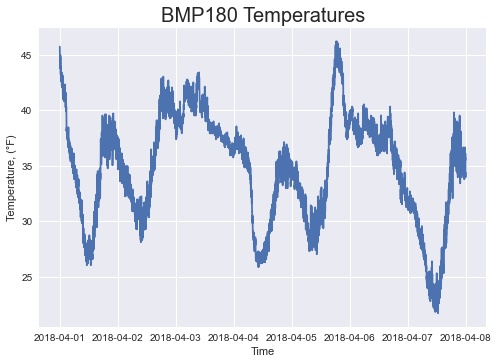

In [17]:
plt.plot(BMP180_April.index, BMP180_April['value'])

plt.title("BMP180 Temperatures", fontsize = 20)
plt.ylabel('Temperature, (°F)')
plt.xlabel('Time')

## Find the Names of the Other Temperature Sensors

First, find all of the temperature sensors.  Then remove the duplicates.

In [18]:
temp_only = data[(data['parameter'] == 'temperature')]
temp_only = temp_only.drop_duplicates("sensor")
temp_only

,node_id,plugin,sensor,parameter,value
timestamp,,,,,
2018-02-15 17:36:42,001e0610ee82,coresense:3,HTU21D,temperature,7.84
2018-02-15 17:36:42,001e0610ee82,coresense:3,TMP421,temperature,9.12
2018-02-15 17:36:42,001e0610ee82,coresense:3,BMP180,temperature,7.10


Let's extract the sensor names into a list. (This will come in handy later.)

In [19]:
sensor_names = temp_only['sensor']
for sensor in sensor_names:
    print(sensor)

HTU21D
TMP421
BMP180


## Make plots for the other 2 temperature sensors: TMP421 and HTU21D (Students)

Don't forget to convert temperatures to Fahrenheit.

Text(0.5, 0, 'Time')

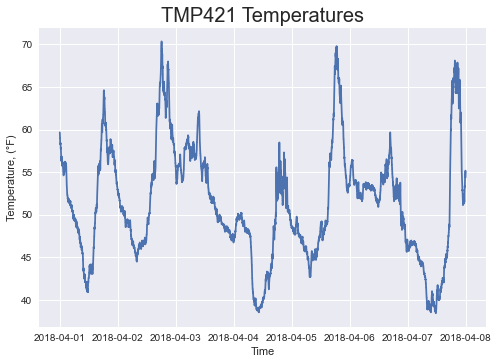

In [20]:
TMP421 = data[(data['sensor'] == 'TMP421') & (data['parameter'] == 'temperature')].copy()

TMP421['value'] = TMP421['value'].apply(cel_to_far)

TMP421_April = TMP421['2018-04-01':'2018-04-07']

plt.plot(TMP421_April.index, TMP421_April['value'])

plt.title("TMP421 Temperatures", fontsize = 20)
plt.ylabel('Temperature, (°F)')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

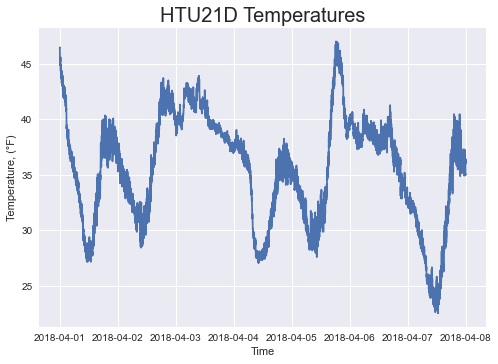

In [21]:
HTU21D = data[(data['sensor'] == 'HTU21D') & (data['parameter'] == 'temperature')].copy()

HTU21D['value'] = HTU21D['value'].apply(cel_to_far)

HTU21D_April = HTU21D['2018-04-01':'2018-04-07']

plt.plot(HTU21D_April.index, HTU21D_April['value'])

plt.title("HTU21D Temperatures", fontsize = 20)
plt.ylabel('Temperature, (°F)')
plt.xlabel('Time')

## Plot on a Single Graph (Instructor)

This was a little tedious to do even though you probably did some cutting and pasting. Remember that if you find yourself doing the same thing over and over, there is probably a more efficient way to do it.

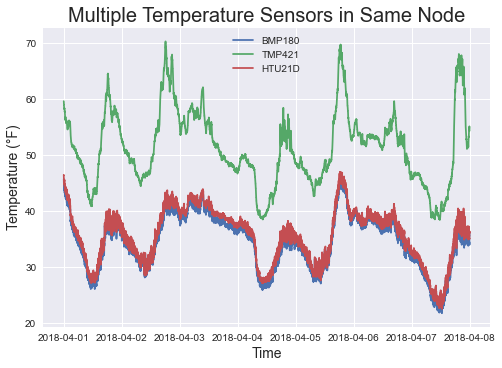

In [22]:
# Remember that we made new dataframes for each of the 3 sensors already and converted to Fahrenheit. 
# If we had not done this, this would have to be in the code as well.

plt.plot(BMP180_April.index, BMP180_April['value'], label="BMP180")
plt.plot(TMP421_April.index, TMP421_April['value'], label="TMP421")
plt.plot(HTU21D_April.index, HTU21D_April['value'], label="HTU21D")

plt.legend()

plt.title("Multiple Temperature Sensors in Same Node", fontsize=20)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Temperature (°F)", fontsize=14);



---

## Simplify With a Loop

By now you may be noticing a pattern.  For each sensor we performed the same operations.  
- We extracted all of the temperature data for that sensor.  
- We converted the temperature from Celsius to Fahrenheit.
- We extracted only the data within a given timeframe.
- We plotted that data on a graph.

The only difference in each of these operations was the name of the sensor. 

Let's repeat this exercise using a for loop, and the list of the sensor names we generated earlier.



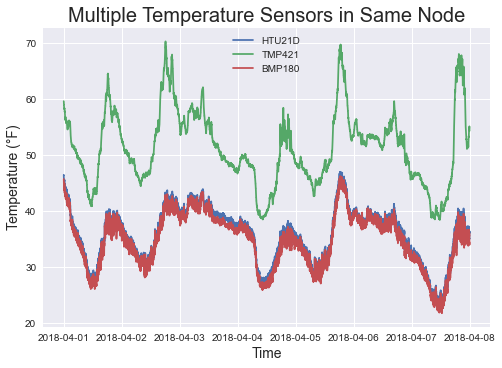

In [23]:

for name in sensor_names:
    sensor_data = (data[(data['sensor'] == name) & (data['parameter'] == 'temperature')].copy())
    sensor_data['value'] = sensor_data['value'].apply(cel_to_far)
    sensor_data_April = (sensor_data['2018-04-01':'2018-04-07'])
    plt.plot(sensor_data_April.index, sensor_data_April['value'], label=name)

    
plt.legend()

plt.title("Multiple Temperature Sensors in Same Node", fontsize=20)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Temperature (°F)", fontsize=14);